In [4]:
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:

import sys
import pandas as pd
import time
import networkx as nx
import matplotlib.pyplot as plt
from greee import et_graph

def SolveAndTransform() -> int:

## Create Reformulation Graph (node: spec, edge:transform)
## Actions: generate spec, generate instance, transform spec, solve instance
    # event: type, time, space,details
    # events: generate instance (abstract spec to constrete spec), translate (Format to format), transform ( spec to spec), solve (concrete spec to solution)
    # 
    etransform_graph = et_graph.EssenceTransformGraph()
    # test spec update to generator call
    start = time.time_ns() 

    spec = r'''find i : int(0..100)
such that
    i = 1 * 2 + 3 * 4
find a : bool
find b : bool
find c : bool
such that
    a = !(b /\ c)'''

    spec_ID = etransform_graph.add_e_node(spec)
    solution = etransform_graph.solve(spec_ID)
    solveTime =time.time_ns() - start
    parentSolutionID = hash(solution)

    # TODO upgrade logs: solution. time, size, number of nodes traversed
    
    start2 = time.time_ns()

    # Transform with GP2 (could be done in parallel)
    progName = "DeMorganTwo.gp2"

    spec2_ID= etransform_graph.transform_with_GP2(spec_ID,progName)
    transformTime = time.time_ns() - start2
    
    # Solve new spec
    solution2 = etransform_graph.solve(spec2_ID)
    instanceSolveTime = time.time_ns() - transformTime
    solutionID = hash(solution2)


    # PLOT
    pos = nx.spring_layout(etransform_graph.graph)
    nx.draw(etransform_graph.graph, pos)
    node_labels = nx.get_node_attributes(etransform_graph.graph,'file_name')
    nx.draw_networkx_labels(etransform_graph.graph, pos, node_labels)
    edge_labels = dict([((n1, n2), d['transformation']) for n1, n2, d in etransform_graph.graph.edges(data=True)])
    nx.draw_networkx_edge_labels(etransform_graph.graph, pos, edge_labels=edge_labels)
    plt.show(block=True)


    return {'parentID': spec_ID, 
                'childID': spec2_ID, 
                'trasform': progName, 
                'transformTime':transformTime, 
                'parentSolveTime' : solveTime,
                'instanceSolveTime':  instanceSolveTime,
                'parentSolutionID':parentSolutionID, 
                'solutionID':solutionID }
    

    

    


['/Users/cls29/ree', '/opt/homebrew/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/cls29/ree/GREEEvenv/lib/python3.11/site-packages']


Generating models for 0xbb5916c32a0bba4.essence
Generated models: model000001.eprime
Saved under: conjure-output
Savile Row: model000001.eprime
Running minion for domain filtering.
Running solver: minion
Copying solution to: 0xbb5916c32a0bba4.solution
Output graph saved to file gp2.output
Generating models for 0x4334ea37013342ab.essence
Generated models: model000001.eprime
Saved under: conjure-output
Savile Row: model000001.eprime
Running minion for domain filtering.
Running solver: minion
Copying solution to: 0x4334ea37013342ab.solution


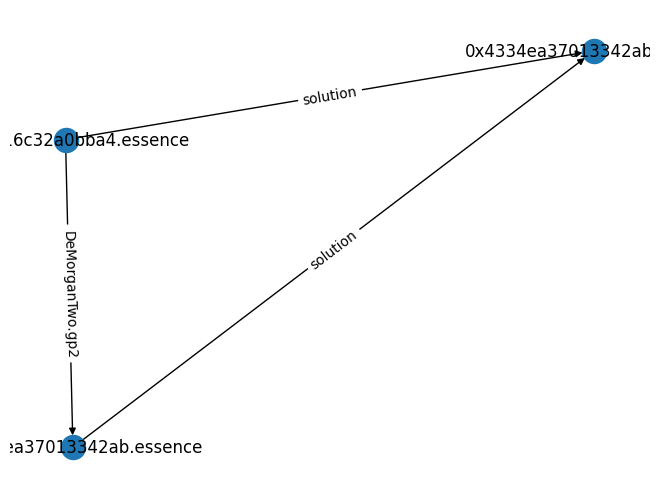

[{'parentID': 843740399093726116, 'childID': 4842753021294363307, 'trasform': 'DeMorganTwo.gp2', 'transformTime': 6698000, 'parentSolveTime': 365677000, 'instanceSolveTime': 1706618158453400000, 'parentSolutionID': 4325305093410201270, 'solutionID': 4325305093410201270}]


In [6]:

# define columns
columns = ['parentID', 'childID', 'trasform', 'transformTime', 'parentSolveTime', 'instanceSolveTime','parentSolutionID', 'solutionID']  
data_rows = []
for i in range(1):
    data_rows.append(SolveAndTransform())
print(data_rows)
dataLogger = pd.DataFrame(data_rows,columns = columns)
#dataLogger.to_csv("experiments/crankSanityCheck.csv")